# Appendix II:Publisher representation in LibraryReads and missing Library of Congress Data

In [1]:
import re
import bs4 #this may be appendices only
import requests #this may be appendices only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import datetime
import seaborn as sns
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [4]:
wide_df=pd.read_csv('wide_df.csv',index_col=0)

In [7]:
missing_permalink=wide_df[wide_df.permalink.isnull()]
print(missing_permalink.title.describe())
missing_permalink.lr_my.value_counts().sort_index()

count                         71
unique                        71
top       Spoiler Alert: A Novel
freq                           1
Name: title, dtype: object


2014/02    1
2014/09    1
2014/11    1
2015/01    1
2015/07    2
2016/02    1
2016/04    1
2016/09    2
2017/09    1
2018/10    1
2018/11    1
2019/03    1
2019/04    1
2019/07    2
2019/08    2
2019/10    1
2019/11    2
2019/12    3
2020/01    1
2020/02    2
2020/03    3
2020/04    1
2020/05    3
2020/06    5
2020/07    1
2020/08    6
2020/09    4
2020/10    4
2020/11    4
2020/12    5
2021/02    4
2021/03    3
Name: lr_my, dtype: int64

Pre-publication books aren't in the LC Catalog, which may explain the 2021/03 missing observations - checking pubdates below indicates that they were all published prior to the LC Catalog searches, so this can't be the cause of their absence.   
Manual search of the Library of Congress confirms no record in the catalog. Possible additional question - patterns in publishers that do not have books with genre data due to omission from the LC Catalog versus no genre data provided

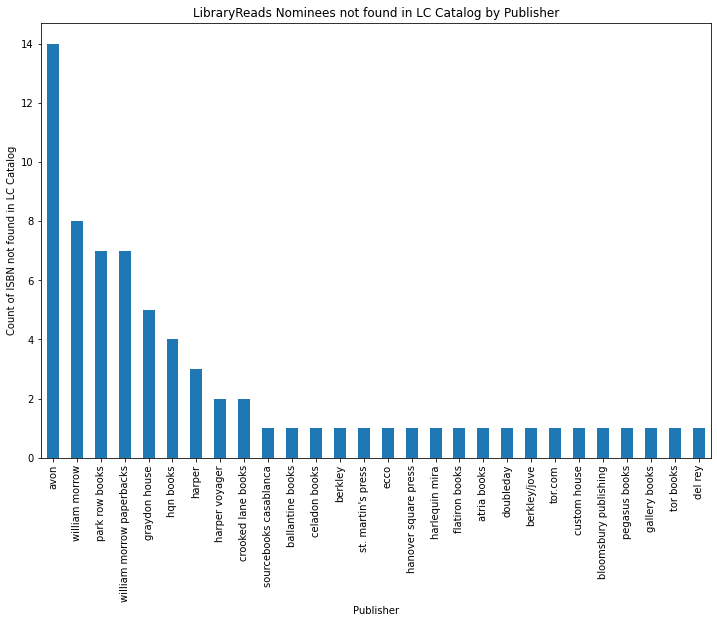

In [9]:
#Data visualization for publishers that don't have LC Catalog matches and frequency
plt.figure(figsize=(12,8))
missing_permalink.publisher.value_counts().plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Count of ISBN not found in LC Catalog')
plt.title('LibraryReads Nominees not found in LC Catalog by Publisher')
plt.show()

Avon, Park Row, HQN and MIRA are all imprints of Harlequin (https://www.harlequin.com/shop/pages/imprints.html), itself a subsidiary of Harper Collins. William Morrow is also an imprint of HarperCollins (https://www.harpercollins.com/pages/corporate-harpercollins-imprints). This in itself isn't particularly surprising - there are 5 major publishing firms in the USA that have substantial market share: Harper Collins, Penguin-Random House, Hatchette, Simon and Schuster, and Macmillan (https://book-editing.com/the-big-5-trade-publishers-and-their-imprints/). 

In [11]:
#Compare no LC match publishers with all LibraryReads list members
print(wide_df.publisher.describe())
wide_df.publisher.value_counts()[0:20]

count         936
unique        113
top       berkley
freq           70
Name: publisher, dtype: object


berkley                      70
william morrow               50
st. martin's press           44
ballantine books             37
minotaur books               36
random house                 34
harper                       33
knopf                        31
doubleday                    25
simon & schuster             23
avon                         23
del rey                      21
w.w. norton & company        20
sourcebooks landmark         19
atria books                  19
g.p. putnam's sons           19
flatiron books               18
crown                        18
little, brown and company    18
algonquin books              15
Name: publisher, dtype: int64

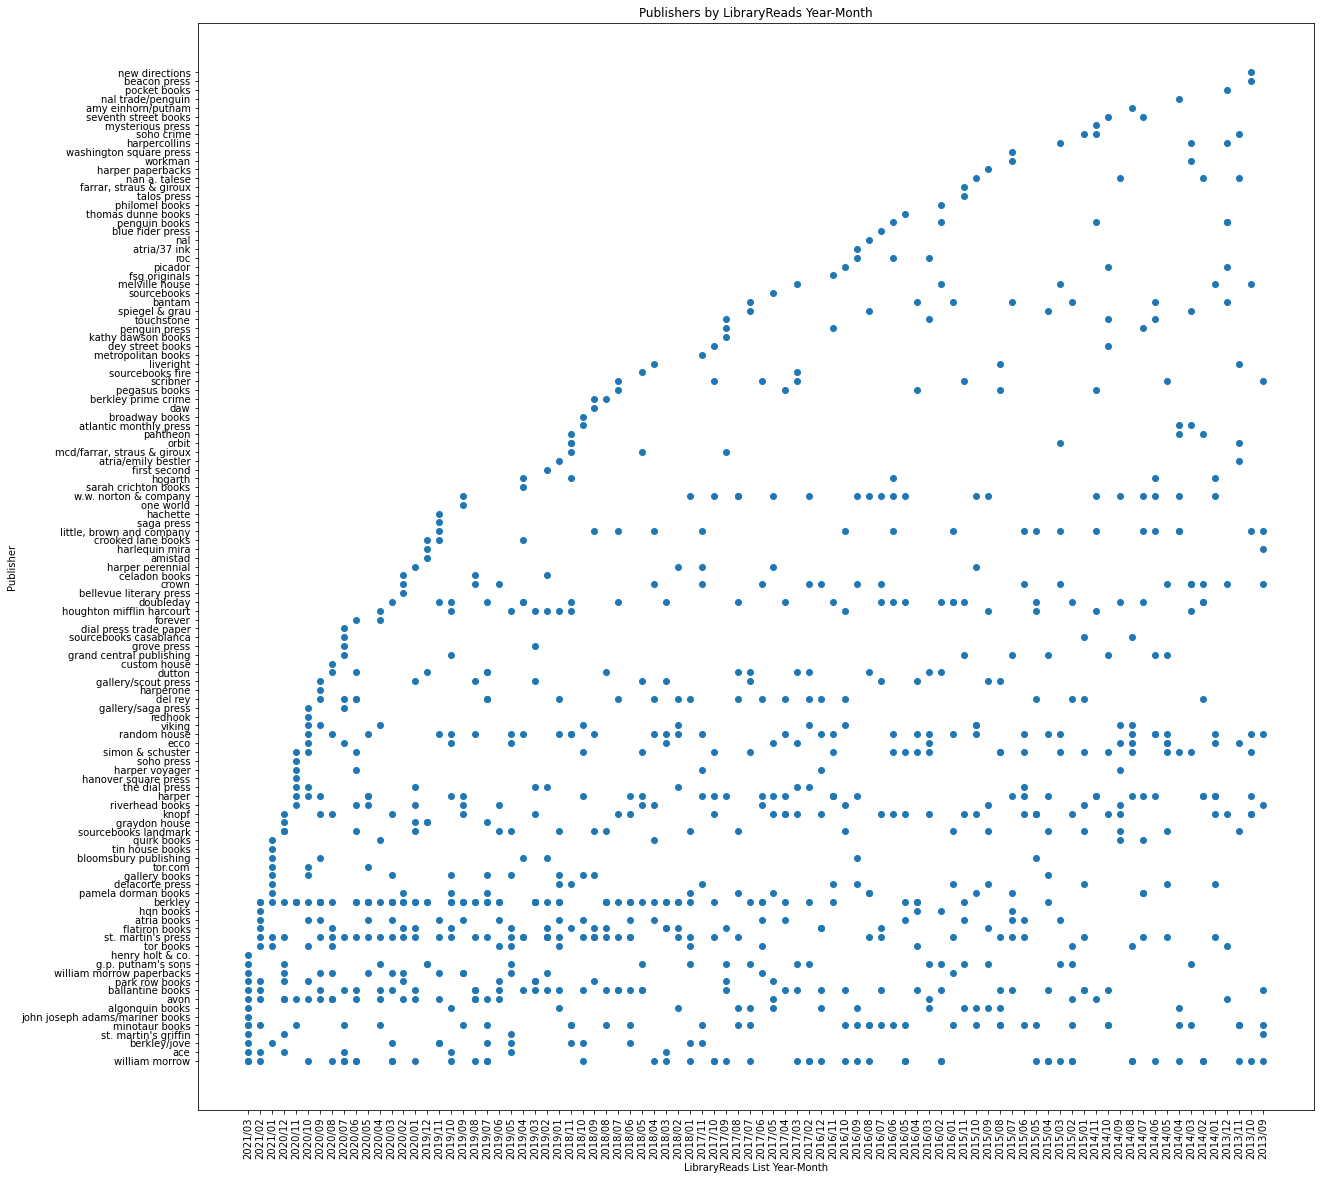

In [14]:
#general distribution by publisher across lists
plt.figure(figsize=(20,20))
plt.scatter(wide_df['lr_my'],wide_df['publisher'])
plt.xticks(rotation=90)
plt.tight_layout
plt.xlabel('LibraryReads List Year-Month')
plt.ylabel('Publisher')
plt.title('Publishers by LibraryReads Year-Month')
plt.show()

In [15]:
wide_df['publisher'].groupby(wide_df['lr_my']).nunique()

lr_my
2013/09    10
2013/10     9
2013/11     9
2013/12     9
2014/01     9
           ..
2020/11    10
2020/12    11
2021/01    11
2021/02    12
2021/03    13
Name: publisher, Length: 86, dtype: int64